In [90]:
import os
import gc
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator


from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.preprocessing import KBinsDiscretizer,Binarizer
from sklearn.impute import SimpleImputer



In [91]:
train_df = pd.read_csv("./train_origin.csv")
test_df = pd.read_csv("./test_origin.csv")

In [92]:
#定类特征
category_feature_list = ['verificationStatus','issueDate','purpose','postCode','regionCode',
                 'initialListStatus','applicationType','earliesCreditLine','title','policyCode']
#定序特征
order_feature_list = ['term','grade','subGrade','employmentLength','homeOwnership']

#定量特征
numerical_feature_list = ['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle',
 'annualIncome', 'isDefault', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh',
 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'n0',
 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']

# 0. object特征处理和缺失值处理

In [93]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       800000 non-null  int64  
 1   loanAmnt                 800000 non-null  float64
 2   term                     800000 non-null  int64  
 3   interestRate             800000 non-null  float64
 4   installment              800000 non-null  float64
 5   grade                    800000 non-null  int64  
 6   subGrade                 800000 non-null  int64  
 7   employmentTitle          800000 non-null  float64
 8   employmentLength         800000 non-null  int64  
 9   homeOwnership            800000 non-null  int64  
 10  annualIncome             800000 non-null  float64
 11  verificationStatus       800000 non-null  int64  
 12  isDefault                800000 non-null  int64  
 13  purpose                  800000 non-null  int64  
 14  post

## 0.1 grade  处理object特征grade,将其进行标签编码

In [94]:
grade_enc = LabelEncoder()
train_df['grade'] = grade_enc.fit_transform(train_df['grade'])
test_df['grade'] = grade_enc.transform(test_df['grade'])

In [95]:
test_df['grade'].isnull().sum()

0

## 0.2 subGrade 处理object特征subGrade

In [96]:
grade_enc = LabelEncoder()
train_df['subGrade'] = grade_enc.fit_transform(train_df['subGrade'])
test_df['subGrade'] = grade_enc.transform(test_df['subGrade'])

## 0.3 employmentLength 处理object employmentLength

In [97]:
imputer = SimpleImputer(strategy='most_frequent')
train_df['employmentLength'] = imputer.fit_transform(train_df[['employmentLength']])
test_df['employmentLength'] = imputer.transform(test_df[['employmentLength']])

In [98]:
employmentLength_enc = LabelEncoder()
train_df['employmentLength'] = employmentLength_enc.fit_transform(train_df['employmentLength'])
test_df['employmentLength'] = employmentLength_enc.transform(test_df['employmentLength'])

## 0.4 issueDate 处理日期特征 issueDate

In [99]:
train_df['issueDate_year'] = pd.DatetimeIndex(train_df['issueDate']).year
test_df['issueDate_year'] = pd.DatetimeIndex(test_df['issueDate']).year

KeyError: 'issueDate'

In [100]:
train_df['issueDate_month'] = pd.DatetimeIndex(train_df['issueDate']).month
test_df['issueDate_month'] = pd.DatetimeIndex(test_df['issueDate']).month

KeyError: 'issueDate'

## 0.5 earliesCreditLine 处理日期特征earliesCreditLine

In [6]:
train_df['earliesCreditLine_year'] = pd.DatetimeIndex(train_df['earliesCreditLine']).year
train_df['earliesCreditLine_month'] = pd.DatetimeIndex(train_df['earliesCreditLine']).month

In [7]:
test_df['earliesCreditLine_year'] = pd.DatetimeIndex(test_df['earliesCreditLine']).year
test_df['earliesCreditLine_month'] = pd.DatetimeIndex(test_df['earliesCreditLine']).month

In [101]:
def PlotNumFeautre(col):
    fig,ax = plt.subplots(figsize = (15, 6))
    sns.histplot(data = train_df, x = col,hue = 'isDefault', ax = ax)
    print("max:{}, min:{}".format(max(train_df[col]), min(train_df[col])))

In [102]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df.drop(labels = [col], axis = 1,inplace= True)
        test_df.drop(labels = [col], axis = 1,inplace= True)

# 1. numerical feature binning

## 1.1 loanAmnt ——bining

max:40000.0, min:500.0


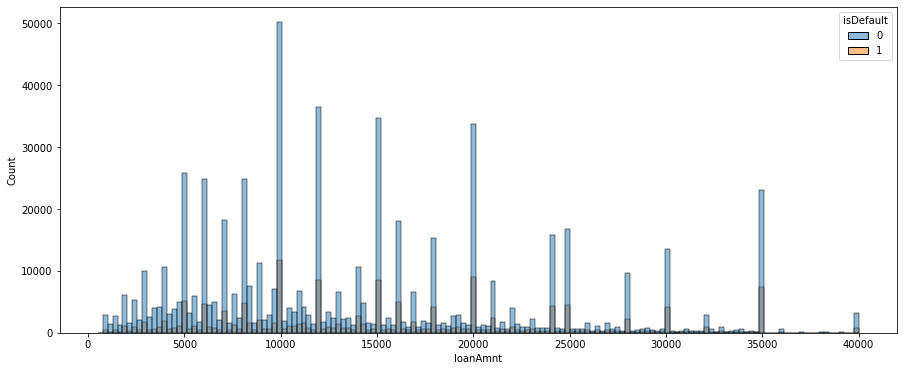

In [103]:
PlotNumFeautre('loanAmnt')

In [104]:
#根据图示可以将 loanAmnt做8个分箱处理
loanAmnt_bin_enc = KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='uniform')

In [105]:
train_df['loanAmnt'] = loanAmnt_bin_enc.fit_transform(train_df[['loanAmnt']])
test_df['loanAmnt'] = loanAmnt_bin_enc.transform(test_df[['loanAmnt']])

## 1.2 interestRate——binning

max:30.99, min:5.31


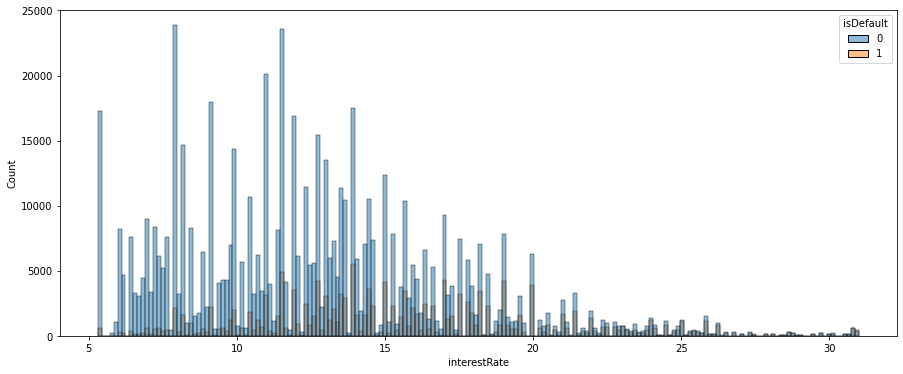

In [106]:
PlotNumFeautre('interestRate')

In [107]:
interestRate_bin_enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
train_df['interestRate'] = interestRate_bin_enc.fit_transform(train_df[['interestRate']])
test_df['interestRate'] = interestRate_bin_enc.transform(test_df[['interestRate']])

## 1.2 installment——binning

max:1715.42, min:15.69


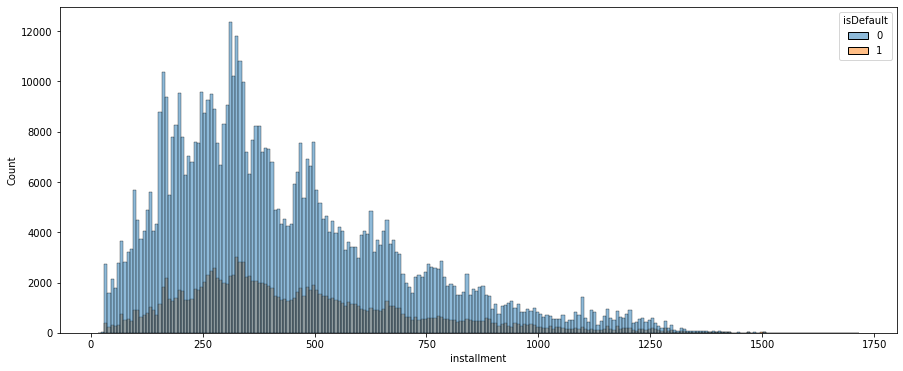

In [108]:
PlotNumFeautre('installment')

In [109]:
installment_bin_enc = KBinsDiscretizer(n_bins=6, encode= 'ordinal', strategy='uniform')
train_df['installment'] = installment_bin_enc.fit_transform(train_df[['installment']])
test_df['installment'] = installment_bin_enc.transform(test_df[['installment']])

## 1.3 employmentTitle——binning

max:378351.0, min:0.0


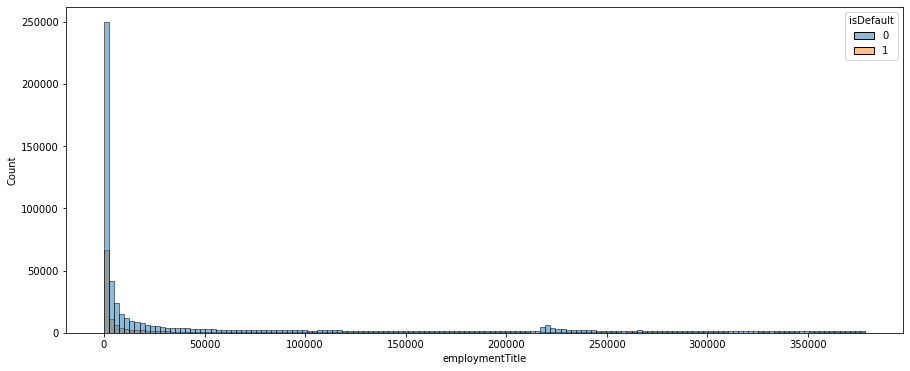

In [110]:
PlotNumFeautre('employmentTitle')

In [111]:
employmentTitle_imputer = SimpleImputer()
train_df['employmentTitle'] = employmentTitle_imputer.fit_transform(train_df[['employmentTitle']])
test_df['employmentTitle'] = employmentTitle_imputer.transform(test_df[['employmentTitle']])

employmentTitle_bin_enc = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
train_df['employmentTitle'] = employmentTitle_bin_enc.fit_transform(train_df[['employmentTitle']])
test_df['employmentTitle'] = employmentTitle_bin_enc.fit_transform(test_df[['employmentTitle']])

## 1.4 annualIncome------binning

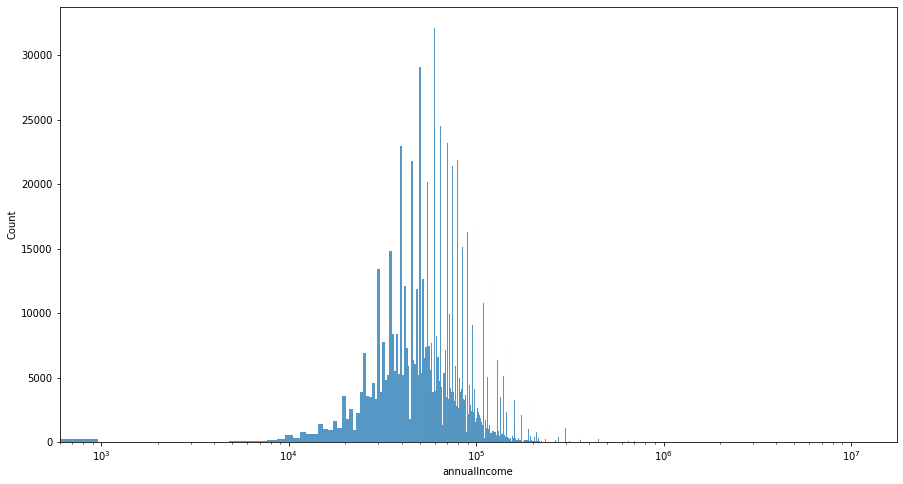

In [112]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df, x = 'annualIncome',ax = ax)
ax.set_xscale('log')

In [113]:
train_df['annualIncome'].value_counts().sort_values()

54829.0         1
57304.0         1
325879.0        1
97532.0         1
36130.0         1
            ...  
40000.0     21057
70000.0     22076
65000.0     23126
50000.0     27062
60000.0     30682
Name: annualIncome, Length: 44926, dtype: int64

In [114]:
'''由于annualIncome特征的取值跨度较大，设定范围进行编码转化'''
def annualIncomeTransform(value):
    if value < 10000:
        return 0
    elif value < 200000:
        return 1
    else:
        return 2
train_df['annualIncome'] = train_df['annualIncome'].apply(annualIncomeTransform)
test_df['annualIncome'] = test_df['annualIncome'].apply(annualIncomeTransform)

## 1.5 dti—binning

In [115]:
train_df['dti'].value_counts().sort_index()

-1.00        2
 0.00      516
 0.01        6
 0.02       10
 0.03       10
          ... 
 797.10      1
 818.10      1
 831.97      1
 991.57      1
 999.00     24
Name: dti, Length: 6322, dtype: int64

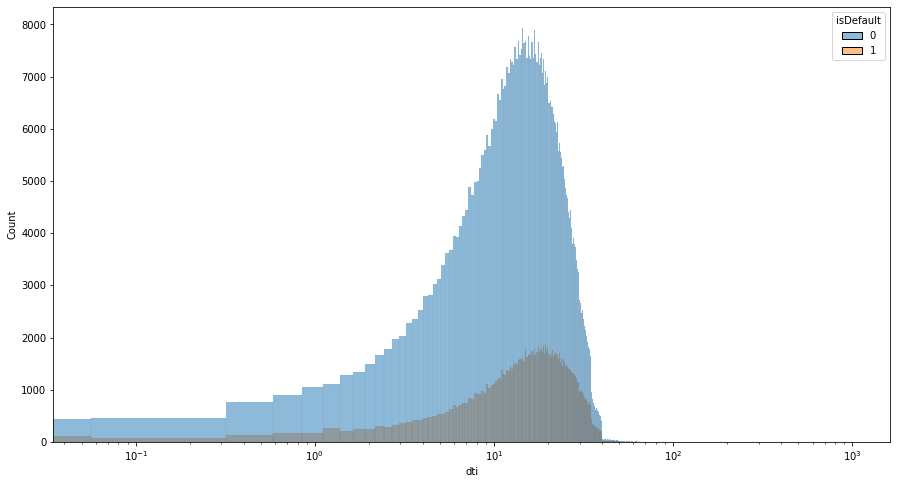

In [116]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df,x = 'dti', hue = 'isDefault', ax = ax)
ax.set_xscale('log')

In [117]:
def dtiTransform(value):
    if value < 0.3:
        return 0
    elif value < 13:
        return 1
    else:
        return 2
train_df['dti'] = train_df['dti'].apply(dtiTransform)
test_df['dti'] = test_df['dti'].apply(dtiTransform)

## 1.6 delinquency_2years—binning

In [118]:
train_df['delinquency_2years'].value_counts()

0.0     645715
1.0     102586
2.0      29944
3.0      10919
4.0       4808
5.0       2504
6.0       1399
7.0        770
8.0        443
9.0        293
10.0       192
11.0       144
12.0        86
14.0        53
13.0        50
15.0        23
16.0        20
18.0        13
19.0        10
20.0         7
17.0         6
22.0         3
21.0         3
29.0         2
26.0         2
25.0         1
27.0         1
39.0         1
30.0         1
24.0         1
Name: delinquency_2years, dtype: int64

max:39.0, min:0.0


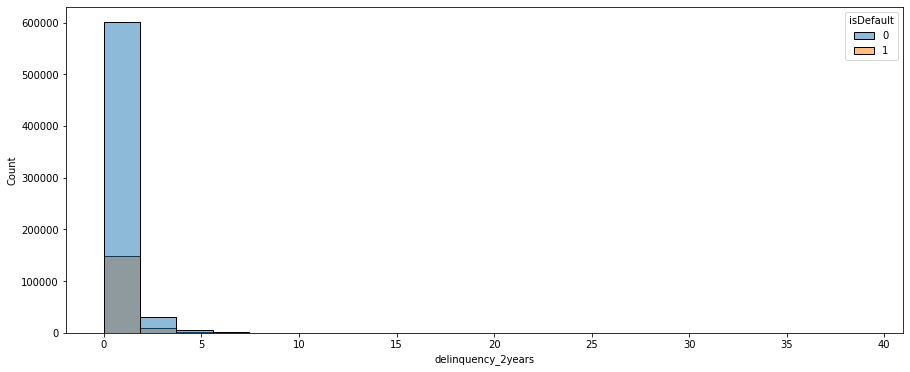

In [119]:
PlotNumFeautre('delinquency_2years')

In [120]:
def delinquency_2yearsTransform(value):
    if value > 6:
        return 7
    else:
        return value
train_df['delinquency_2years'] = train_df['delinquency_2years'].apply(
    delinquency_2yearsTransform)
test_df['delinquency_2years'] = test_df['delinquency_2years'].apply(
    delinquency_2yearsTransform)

## 1.7 ficoRangeLow——binning

In [121]:
train_df['ficoRangeLow'].value_counts()

660.0    71974
670.0    69815
665.0    69619
675.0    61993
680.0    61294
685.0    53668
690.0    52046
695.0    47065
700.0    43292
705.0    39030
710.0    34296
715.0    30154
720.0    26036
725.0    20766
730.0    18186
735.0    14377
740.0    12585
745.0    10336
750.0     9419
755.0     8191
760.0     6716
765.0     6163
770.0     5311
775.0     4882
780.0     4286
785.0     3476
790.0     3284
795.0     2637
800.0     2261
805.0     1942
810.0     1408
815.0     1111
820.0      827
825.0      636
830.0      412
835.0      249
840.0      140
845.0      116
630.0        1
Name: ficoRangeLow, dtype: int64

max:845.0, min:630.0


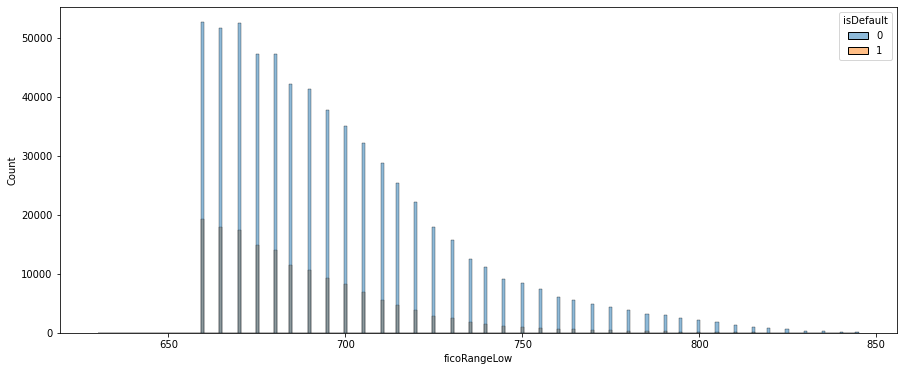

In [122]:
PlotNumFeautre('ficoRangeLow')

In [123]:
train_df['ficoRangeLow'] = train_df['ficoRangeLow'].apply(lambda x: 660 if x < 660 else x)
test_df['ficoRangeLow'] = test_df['ficoRangeLow'].apply(lambda x: 660 if x < 660 else x)

## 1.8 ficoRangeHigh —binning

In [124]:
train_df['ficoRangeHigh'].value_counts()

664.0    71974
674.0    69815
669.0    69619
679.0    61993
684.0    61294
689.0    53668
694.0    52046
699.0    47065
704.0    43292
709.0    39030
714.0    34296
719.0    30154
724.0    26036
729.0    20766
734.0    18186
739.0    14377
744.0    12585
749.0    10336
754.0     9419
759.0     8191
764.0     6716
769.0     6163
774.0     5311
779.0     4882
784.0     4286
789.0     3476
794.0     3284
799.0     2637
804.0     2261
809.0     1942
814.0     1408
819.0     1111
824.0      827
829.0      636
834.0      412
839.0      249
844.0      140
850.0      116
634.0        1
Name: ficoRangeHigh, dtype: int64

max:850.0, min:634.0


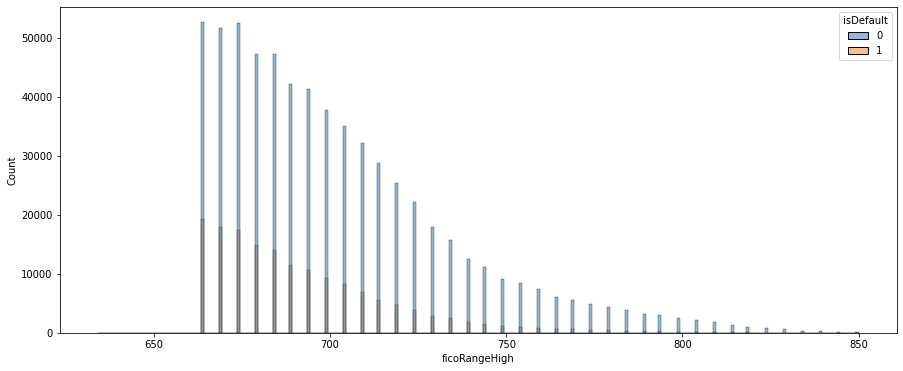

In [125]:
PlotNumFeautre('ficoRangeHigh')

In [126]:
train_df['ficoRangeHigh'] = train_df['ficoRangeHigh'].apply(lambda x: 664 if x < 664 else x)
test_df['ficoRangeHigh'] = test_df['ficoRangeHigh'].apply(lambda x: 664 if x < 664 else x)

## 1.9 openAcc——binning

In [127]:
train_df['openAcc'].value_counts()

9.0     70865
10.0    69171
8.0     68201
11.0    64069
7.0     61355
        ...  
82.0        1
81.0        1
86.0        1
74.0        1
67.0        1
Name: openAcc, Length: 75, dtype: int64

max:86.0, min:0.0


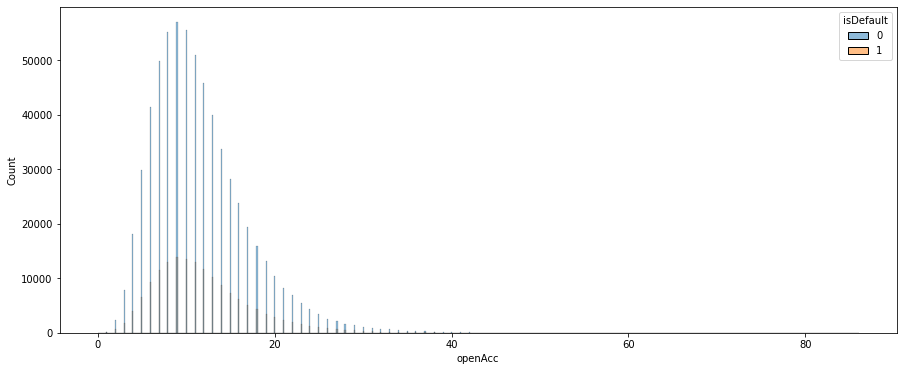

In [128]:
PlotNumFeautre('openAcc')

## 1.10 pubRec—binning

In [129]:
train_df['pubRec'].value_counts()

0.0     664765
1.0     113186
2.0      14520
3.0       4432
4.0       1535
5.0        757
6.0        367
7.0        165
8.0        105
9.0         51
10.0        37
11.0        23
12.0        14
15.0         7
13.0         6
16.0         4
18.0         4
22.0         2
24.0         2
19.0         2
21.0         2
20.0         2
14.0         2
49.0         2
63.0         1
46.0         1
28.0         1
86.0         1
54.0         1
40.0         1
47.0         1
17.0         1
Name: pubRec, dtype: int64

max:86.0, min:0.0


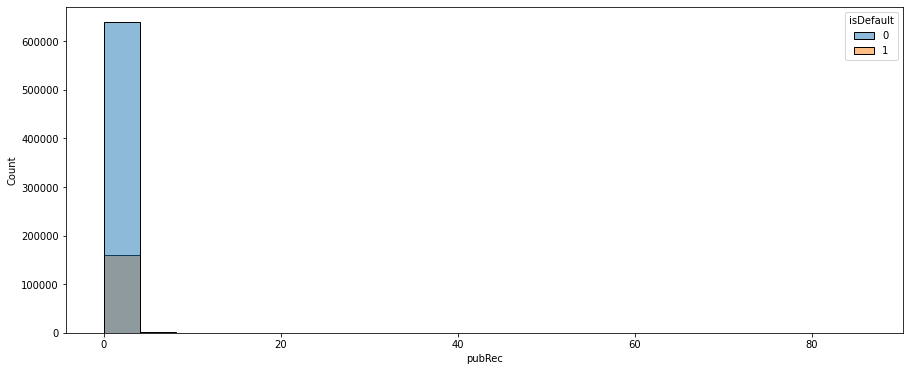

In [130]:
PlotNumFeautre('pubRec')

In [131]:
train_df['pubRec'] = train_df['pubRec'].apply(lambda x: x if x <= 1 else 2)
test_df['pubRec'] = test_df['pubRec'].apply(lambda x: x if x <= 1 else 2)

## 1.11 pubRecBankruptcies——binning

In [132]:
train_df['pubRecBankruptcies'].value_counts()

0.000000     700076
1.000000      93639
2.000000       4566
3.000000        945
0.134163        405
4.000000        248
5.000000         80
6.000000         23
7.000000         11
9.000000          3
8.000000          3
12.000000         1
Name: pubRecBankruptcies, dtype: int64

In [133]:
train_df['pubRecBankruptcies'] = train_df['pubRecBankruptcies'].apply(lambda x: x if x <= 2 else 3)
test_df['pubRecBankruptcies'] = test_df['pubRecBankruptcies'].apply(lambda x: x if x <= 2 else 3)

## 1.12 revolBal —binning

In [134]:
train_df['revolUtil'].value_counts()

0.00      4170
55.00     1589
61.00     1579
57.00     1575
53.00     1575
          ... 
120.90       1
107.90       1
49.69        1
0.75         1
136.40       1
Name: revolUtil, Length: 1287, dtype: int64

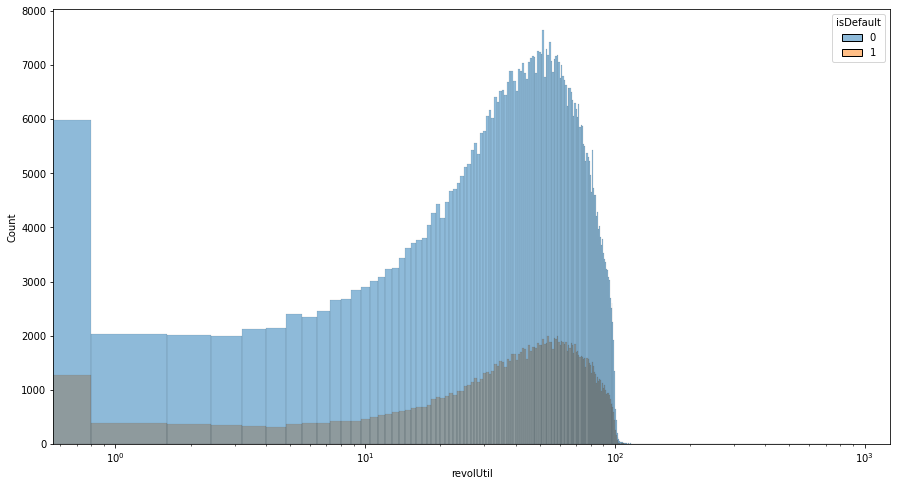

In [135]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = train_df, x = 'revolUtil',hue = 'isDefault', ax = ax)
ax.set_xscale('log')

In [136]:
def revolUtilTransform(value):
    if value <= 10:
        return 0
    elif value <= 100:
        return 1
    else:
        return 2
train_df['revolUtil'] = train_df['revolUtil'].apply(revolUtilTransform)
test_df['revolUtil'] = test_df['revolUtil'].apply(revolUtilTransform)

## 1.13 totalAcc—binning

In [137]:
train_df['totalAcc'].value_counts()

20.0     28956
21.0     28820
19.0     28697
22.0     28671
18.0     28188
         ...  
151.0        1
146.0        1
103.0        1
141.0        1
129.0        1
Name: totalAcc, Length: 134, dtype: int64

max:162.0, min:2.0


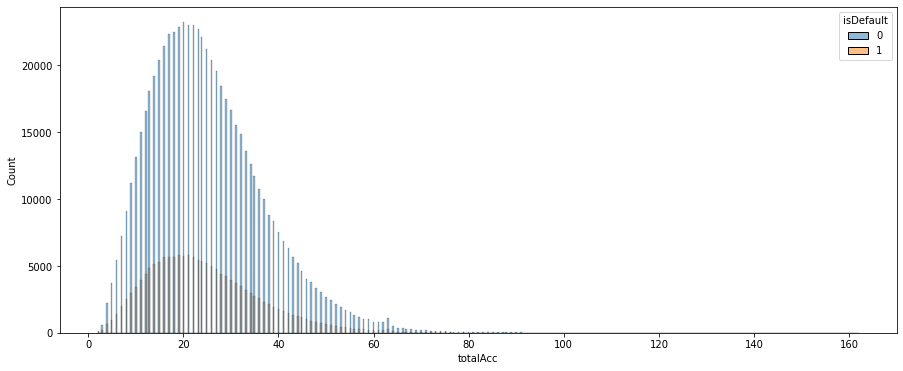

In [138]:
PlotNumFeautre('totalAcc')

In [139]:
train_df['revolUtil'] = train_df['revolUtil'].apply(revolUtilTransform)
test_df['revolUtil'] = test_df['revolUtil'].apply(revolUtilTransform)

## 1.14 n0——binning

In [140]:
train_df['n0'].value_counts()

0.000000     579427
1.000000      96105
0.511932      40270
2.000000      38793
3.000000      17657
4.000000      10521
5.000000       6132
6.000000       3893
7.000000       2472
8.000000       1567
9.000000       1002
10.000000       676
11.000000       423
12.000000       331
13.000000       185
14.000000       166
15.000000        84
16.000000        76
17.000000        45
18.000000        34
19.000000        23
20.000000        18
23.000000        15
22.000000        15
21.000000        13
24.000000        12
26.000000        10
25.000000         9
29.000000         5
31.000000         4
27.000000         3
28.000000         3
34.000000         2
33.000000         2
30.000000         2
51.000000         1
35.000000         1
38.000000         1
39.000000         1
32.000000         1
Name: n0, dtype: int64

In [141]:
train_df['n0'] = train_df['n0'].apply(lambda x: x if x < 10 else 11)
test_df['n0'] = test_df['n0'].apply(lambda x: x if x < 10 else 11)

## 1.15 n1——binning

In [142]:
train_df['n1'].value_counts()

3.00000     163008
2.00000     154693
4.00000     126573
1.00000      87122
5.00000      84396
6.00000      52103
3.64233      40270
7.00000      30905
8.00000      18148
0.00000      16266
9.00000      10688
10.00000      6328
11.00000      3766
12.00000      2265
13.00000      1366
14.00000       732
15.00000       494
16.00000       295
17.00000       222
18.00000       128
19.00000        83
20.00000        36
21.00000        30
22.00000        25
23.00000        17
24.00000        12
26.00000         9
25.00000         6
30.00000         5
27.00000         3
28.00000         2
33.00000         2
32.00000         1
29.00000         1
Name: n1, dtype: int64

In [143]:
train_df['n1'] = train_df['n1'].apply(lambda x : x if x < 14 else 14)
test_df['n1'] = test_df['n1'].apply(lambda x : x if x < 14 else 14)

## 1.16 n2——binning

In [144]:
train_df['n2'].value_counts()

4.000000     117211
5.000000     108116
3.000000     106623
6.000000      88160
2.000000      70566
7.000000      68102
8.000000      50430
5.642648      40270
9.000000      35775
1.000000      26544
10.000000     25155
11.000000     17424
12.000000     12317
13.000000      8579
14.000000      6132
15.000000      4392
0.000000       3271
16.000000      3058
17.000000      2237
18.000000      1479
19.000000      1179
20.000000       814
21.000000       545
22.000000       414
23.000000       303
24.000000       216
25.000000       168
26.000000       129
27.000000        90
28.000000        64
29.000000        54
30.000000        39
31.000000        27
32.000000        24
34.000000        17
33.000000        16
36.000000        13
35.000000        10
38.000000         7
37.000000         6
39.000000         5
42.000000         4
43.000000         4
41.000000         2
40.000000         2
44.000000         2
63.000000         1
52.000000         1
46.000000         1
57.000000         1


In [145]:
def n2Transform(value):
    if value < 20 :
        return value
    else:
        return 20
train_df['n2'] = train_df['n2'].apply(n2Transform)
test_df['n2'] = test_df['n2'].apply(n2Transform)

## 1.17 n3——binning

In [146]:
train_df['n3'].value_counts()

4.000000     117211
5.000000     108116
3.000000     106623
6.000000      88160
2.000000      70566
7.000000      68102
8.000000      50430
5.642648      40270
9.000000      35775
1.000000      26544
10.000000     25155
11.000000     17424
12.000000     12317
13.000000      8579
14.000000      6132
15.000000      4392
0.000000       3271
16.000000      3058
17.000000      2237
18.000000      1479
19.000000      1179
20.000000       814
21.000000       545
22.000000       414
23.000000       303
24.000000       216
25.000000       168
26.000000       129
27.000000        90
28.000000        64
29.000000        54
30.000000        39
31.000000        27
32.000000        24
34.000000        17
33.000000        16
36.000000        13
35.000000        10
38.000000         7
37.000000         6
39.000000         5
42.000000         4
43.000000         4
41.000000         2
40.000000         2
44.000000         2
63.000000         1
52.000000         1
46.000000         1
57.000000         1


In [147]:
def n3Transform(value):
    if value < 20 :
        return value
    else:
        return 20
train_df['n3'] = train_df['n3'].apply(n3Transform)
test_df['n3'] = test_df['n3'].apply(n3Transform)

## 1.18 n4——binning

In [148]:
train_df['n4'].value_counts()

3.000000     134529
4.000000     128078
2.000000     105568
5.000000     103239
6.000000      75699
7.000000      52687
1.000000      49656
8.000000      35717
4.735641      33239
9.000000      23893
10.000000     15962
11.000000     10682
0.000000       7785
12.000000      7122
13.000000      4804
14.000000      3253
15.000000      2374
16.000000      1527
17.000000      1114
18.000000       839
19.000000       553
20.000000       407
21.000000       286
22.000000       238
23.000000       157
24.000000       145
25.000000       114
26.000000        65
27.000000        59
28.000000        40
29.000000        33
30.000000        29
31.000000        22
32.000000        17
33.000000        14
35.000000        11
36.000000        10
37.000000         6
40.000000         5
38.000000         5
34.000000         5
39.000000         4
41.000000         2
46.000000         2
42.000000         2
49.000000         1
43.000000         1
Name: n4, dtype: int64

In [149]:
train_df['n4'] = train_df['n4'].apply(lambda x: x if x < 18 else 18)
test_df['n4'] = test_df['n4'].apply(lambda x: x if x < 18 else 18)

## 1.19 n5

In [150]:
train_df['n5'].value_counts()

5.0     76576
6.0     75679
4.0     71175
7.0     71021
8.0     64347
        ...  
57.0        1
64.0        1
66.0        1
63.0        1
68.0        1
Name: n5, Length: 66, dtype: int64

max:70.0, min:0.0


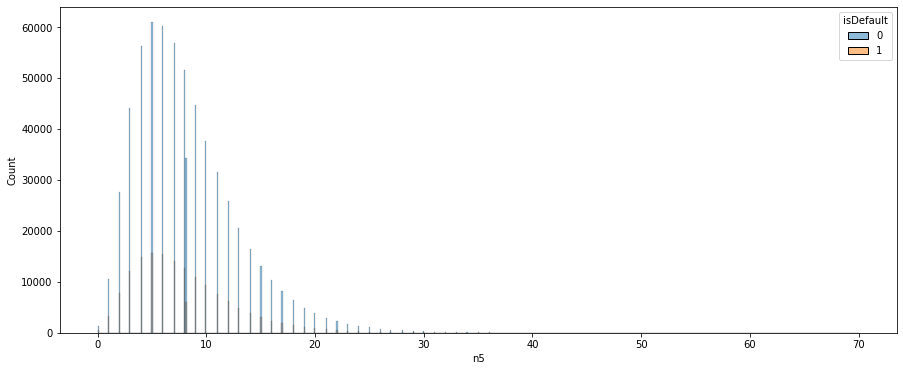

In [151]:
PlotNumFeautre('n5')

In [152]:
train_df['n5'] = train_df['n5'].apply(lambda x: x if x <30 else 30)
test_df['n5'] = test_df['n5'].apply(lambda x: x if x <30 else 30)

## 1.20 n6

In [153]:
train_df['n6'].value_counts()

4.0      64692
3.0      64139
5.0      61863
2.0      58022
6.0      57240
         ...  
94.0         1
100.0        1
98.0         1
113.0        1
104.0        1
Name: n6, Length: 108, dtype: int64

max:132.0, min:0.0


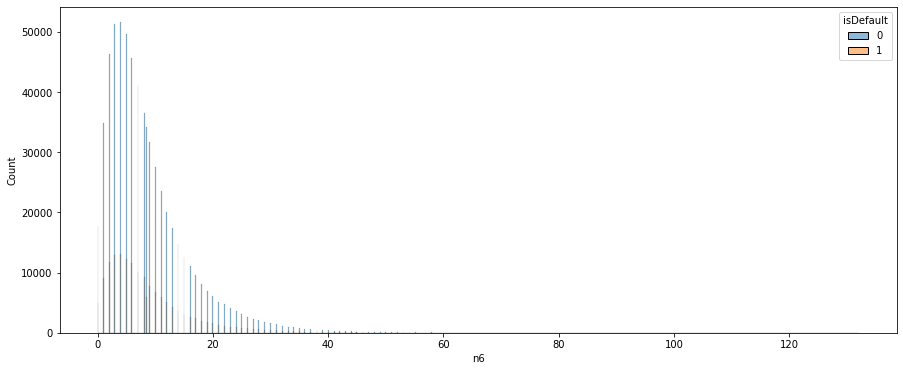

In [154]:
PlotNumFeautre('n6')

In [155]:
train_df['n6'] = train_df['n6'].apply(lambda x: x  if x < 40 else 40)
test_df['n6'] = test_df['n6'].apply(lambda x: x  if x < 40 else 40)

## 1.21 n7

In [156]:
train_df['n7'].value_counts()

6.0     83331
5.0     80569
7.0     79026
8.0     71219
4.0     68256
        ...  
73.0        1
59.0        1
63.0        1
77.0        1
53.0        1
Name: n7, Length: 71, dtype: int64

max:79.0, min:0.0


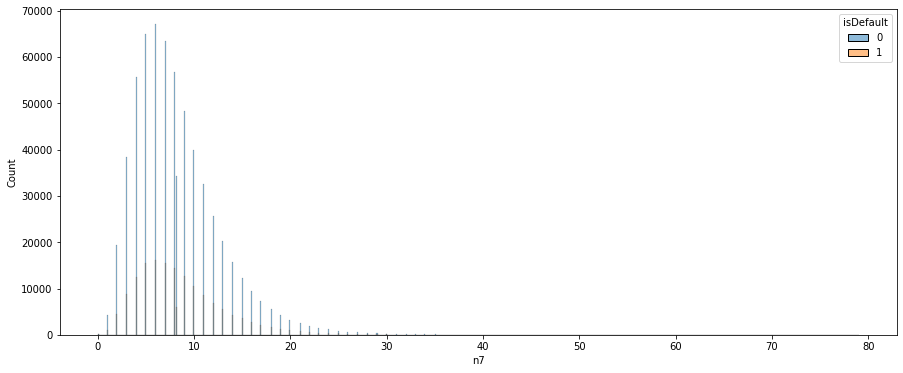

In [157]:
PlotNumFeautre('n7')

In [158]:
train_df['n7'] = train_df['n7'].apply(lambda x: x if x < 30 else 30)
test_df['n7'] = test_df['n7'].apply(lambda x: x if x < 30 else 30)

## 1.22 n8

In [159]:
train_df['n8'].value_counts()

11.0     44808
10.0     44653
9.0      43882
12.0     43358
8.0      42024
         ...  
128.0        1
107.0        1
87.0         1
127.0        1
83.0         1
Name: n8, Length: 103, dtype: int64

max:128.0, min:1.0


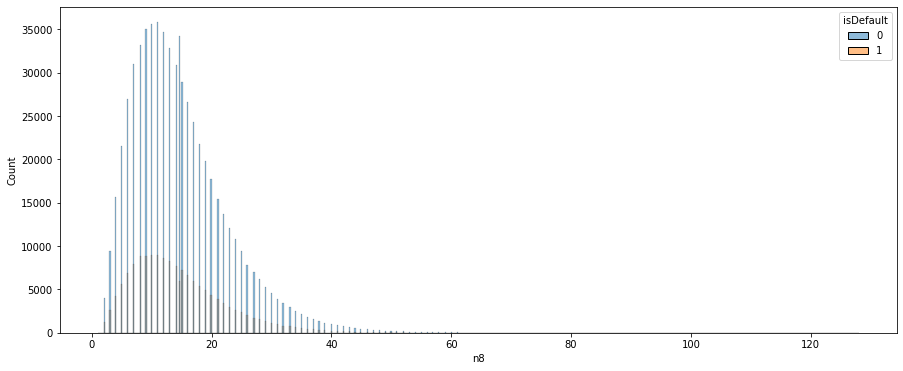

In [160]:
PlotNumFeautre('n8')

In [161]:
train_df['n8'] = train_df['n8'].apply(lambda x: x if x < 50 else 50)
test_df['n8'] = test_df['n8'].apply(lambda x: x if x < 50 else 50)

## 1.23 n9

In [162]:
train_df['n9'].value_counts()

4.000000     118134
5.000000     108976
3.000000     107222
6.000000      88847
2.000000      70902
7.000000      68413
8.000000      50342
5.592345      40270
9.000000      35601
1.000000      26464
10.000000     24868
11.000000     17092
12.000000     11982
13.000000      8207
14.000000      5836
15.000000      4066
0.000000       3228
16.000000      2839
17.000000      2010
18.000000      1286
19.000000      1045
20.000000       697
21.000000       461
22.000000       316
23.000000       240
24.000000       167
25.000000       132
26.000000        96
27.000000        64
28.000000        51
29.000000        42
30.000000        24
31.000000        15
32.000000        15
34.000000        12
33.000000        11
36.000000         5
35.000000         5
39.000000         4
43.000000         4
37.000000         3
38.000000         3
45.000000         1
44.000000         1
42.000000         1
Name: n9, dtype: int64

In [163]:
train_df['n9'] = train_df['n9'].apply(lambda x: x if x < 26 else 26)
test_df['n9'] = test_df['n9'].apply(lambda x: x if x < 26 else 26)

## 1.24 n10

In [164]:
train_df['n10'].value_counts()

9.0     68023
10.0    66407
8.0     65287
11.0    61601
7.0     58455
        ...  
80.0        1
64.0        1
75.0        1
74.0        1
67.0        1
Name: n10, Length: 77, dtype: int64

max:82.0, min:0.0


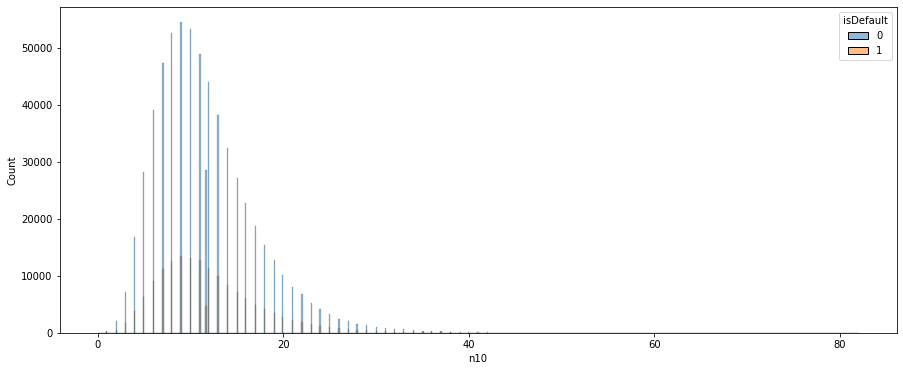

In [165]:
PlotNumFeautre('n10')

In [166]:
train_df['n10'] = train_df['n10'].apply(lambda x: x if x < 35 else 35)
test_df['n10'] = test_df['n10'].apply(lambda x: x if x < 35 else 35)

## 1.25 n11

In [167]:
train_df['n11'].value_counts()

0.000000    729682
0.000815     69752
1.000000       540
2.000000        24
4.000000         1
3.000000         1
Name: n11, dtype: int64

In [168]:
train_df['n11'] = train_df['n11'].apply(lambda x: x if x < 2 else 2)
test_df['n11'] = test_df['n11'].apply(lambda x: x if x < 2 else 2)

## 1.26 n12

In [169]:
train_df['n12'].value_counts()

0.000000    757315
0.003384     40270
1.000000      2281
2.000000       115
3.000000        16
4.000000         3
Name: n12, dtype: int64

In [170]:
train_df['n12'] = train_df['n12'].apply(lambda x: x if x < 2 else 2)
test_df['n12'] = test_df['n12'].apply(lambda x: x if x < 2 else 2)

## 1.27 n13 

In [171]:
train_df['n13'].value_counts()

0.000000     716131
0.089366      40270
1.000000      32506
2.000000       6565
3.000000       1780
4.000000        993
5.000000        528
6.000000        405
7.000000        222
8.000000        172
9.000000        138
10.000000        83
11.000000        67
12.000000        36
14.000000        28
13.000000        22
15.000000        11
16.000000         9
18.000000         9
20.000000         7
19.000000         5
26.000000         3
22.000000         3
17.000000         2
21.000000         1
39.000000         1
29.000000         1
30.000000         1
24.000000         1
Name: n13, dtype: int64

In [172]:
train_df['n13'] = train_df['n13'].apply(lambda x: x if x < 10 else 10)
test_df['n13'] = test_df['n13'].apply(lambda x: x if x < 10 else 10)

## 1.28 n14

In [173]:
train_df['n14'].value_counts()

1.000000     187501
2.000000     171704
0.000000     128053
3.000000     124621
4.000000      73869
2.178606      40270
5.000000      36018
6.000000      17388
7.000000       9460
8.000000       4902
9.000000       2692
10.000000      1423
11.000000       835
12.000000       489
13.000000       278
14.000000       194
15.000000       101
16.000000        74
17.000000        43
18.000000        17
20.000000        17
19.000000        16
21.000000         8
23.000000         7
24.000000         5
25.000000         4
22.000000         4
26.000000         3
28.000000         1
27.000000         1
29.000000         1
30.000000         1
Name: n14, dtype: int64

In [174]:
train_df['n14'] = train_df['n14'].apply(lambda x: x if x < 11 else 11)
test_df['n14'] = test_df['n14'].apply(lambda x: x if x < 11 else 11)

In [175]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       800000 non-null  int64  
 1   loanAmnt                 800000 non-null  float64
 2   term                     800000 non-null  int64  
 3   interestRate             800000 non-null  float64
 4   installment              800000 non-null  float64
 5   grade                    800000 non-null  int64  
 6   subGrade                 800000 non-null  int64  
 7   employmentTitle          800000 non-null  float64
 8   employmentLength         800000 non-null  int64  
 9   homeOwnership            800000 non-null  int64  
 10  annualIncome             800000 non-null  int64  
 11  verificationStatus       800000 non-null  int64  
 12  isDefault                800000 non-null  int64  
 13  purpose                  800000 non-null  int64  
 14  post

In [176]:
imputer  = SimpleImputer(strategy='most_frequent')
train_df['title'] = imputer.fit_transform(train_df[['title']])
test_df['title'] = imputer.transform(test_df[['title']])

train_df['postCode'] = imputer.fit_transform(train_df[['postCode']])
test_df['postCode'] = imputer.transform(test_df[['postCode']])




In [177]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df.drop(labels = [col], axis = 1, inplace = True)
        test_df.drop(labels = [col], axis = 1, inplace = True)

In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       800000 non-null  int64  
 1   loanAmnt                 800000 non-null  float64
 2   term                     800000 non-null  int64  
 3   interestRate             800000 non-null  float64
 4   installment              800000 non-null  float64
 5   grade                    800000 non-null  int64  
 6   subGrade                 800000 non-null  int64  
 7   employmentTitle          800000 non-null  float64
 8   employmentLength         800000 non-null  int64  
 9   homeOwnership            800000 non-null  int64  
 10  annualIncome             800000 non-null  int64  
 11  verificationStatus       800000 non-null  int64  
 12  isDefault                800000 non-null  int64  
 13  purpose                  800000 non-null  int64  
 14  post

In [180]:
train_df.head().T

,0,1,2,3,4
id,0.0,1.000000,2.0,3.0,4.0
loanAmnt,6.0,3.000000,2.0,2.0,0.0
term,5.0,5.000000,5.0,3.0,3.0
interestRate,2.0,2.000000,2.0,0.0,1.0
installment,3.0,1.000000,0.0,1.0,0.0
grade,4.0,3.000000,3.0,0.0,2.0
subGrade,21.0,16.000000,17.0,3.0,11.0
employmentTitle,0.0,1.000000,0.0,0.0,0.0
employmentLength,2.0,5.000000,8.0,1.0,11.0
homeOwnership,2.0,0.000000,0.0,1.0,1.0


In [181]:
train_df.to_csv("./train_bin.csv", index = False)
test_df.to_csv("./test_bin.csv", index = False)